In [2]:
import os
# !git clone https://github.com/shuaibw/Handwriting-Transformers-CSE-472.git Handwriting-Transformers
os.chdir('Handwriting-Transformers')


FileNotFoundError: [Errno 2] No such file or directory: 'Handwriting-Transformers'

In [ ]:
! git checkout main

In [ ]:
!git checkout eng_bang_train

In [ ]:
!git pull

In [ ]:
!git checkout generate_images_for_fid

In [ ]:
!pip install --upgrade --no-cache-dir gdown


In [ ]:
!gdown 1kRWVk8cGCR_YIcQF-8o0NLub-DDoHuan

In [ ]:
!gdown 1BoIduiK_ovoPHSyVuTT3MjB7sErgnq-7 

# !mkdir -p saved_models/BN-UNIFIED-1-339-15-E3D3-LR0.00005-bs8
# !cp model200_pretrained_BN.pth saved_models/BN-UNIFIED-1-339-15-E3D3-LR0.00005-bs8/model.pth

In [ ]:
!gdown 18Q55Y79O_ESm8sWFZx4RTlBbUykZ3Gwi # BN-EN-WORDS.txt
!gdown 1JwztzCtnhQ0NuJDw5j4QeBbq-knzoX5G # BN-EN-IAM-MULTI.pickle

In [ ]:
!gdown 1eqEvidTW-VYzsbvuZ3N4_mRO_njW_XNw # bn-words.txt
!gdown 11IlGMmXRQFQBITvPxszj5uCicd9_gjoW # BN-UNIFIED-NO-SINGLE.pickle

In [ ]:
!mkdir files

In [ ]:
!mv bn_words.txt files/bn_words_updated.txt

In [ ]:
# ALPHABET = 'Only thewigsofrcvdampbkuq.A-210xT5\'MDL,RYHJ"ISPWENj&BC93VGFKz();#:!7U64Q8?+*ZX/%'
ALPHABET = "',:।ঁংঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‌‍–—"

# IMG_FILE='BN-EN-IAM-MULTI.pickle'
# IMG_FILE_CLEANED = 'files/BN-ENG-CLEANED.pickle'

IMG_FILE='/kaggle/working/Handwriting-Transformers/BN-UNIFIED-NO-SINGLE.pickle'
IMG_FILE_CLEANED = 'files/BN-UNIFIED-CLEANED.pickle'


# for char in BN_ALPHABET:
#     if char not in ALPHABET: ALPHABET += char

def remove(data):
    keys = data.keys()
    for key in keys:
        cData = data[key]
        for wKey in cData.keys():
            writerData = cData[wKey]
            indices_to_remove = []
            n = len(writerData)
            for i in range(n):
                label = writerData[i]['label']
                for char in label:
                    if char not in ALPHABET:
                        label = label.replace(char, '')
                if len(label) == 0:
                    indices_to_remove.append(i)
                else:
                    writerData[i]['label'] = label
            indices_to_remove = indices_to_remove[::-1]
            for i in indices_to_remove:
                # print(i)
                del writerData[i]
                

# read pickle file
import pickle

# Open the pickle file in binary read mode
with open(IMG_FILE, 'rb') as file:
    data = pickle.load(file)

remove(data)

saveTo = IMG_FILE_CLEANED
with open(saveTo, 'wb') as file:
    pickle.dump(data, file)


In [ ]:
!mv BN-EN-WORDS.txt files/BN-EN-WORDS.txt

In [ ]:
import wandb
wandb.login(key='')

In [ ]:
!python train.py

In [ ]:
!pip install pytorch-fid

In [ ]:
import pytorch_fid

# Define paths to the real and generated image folders in Kaggle's input directory
DATASET_PATH = '/kaggle/working/Handwriting-Transformers/saved_images/BN-UNIFIED-1-339-15-E3D3-LR0.00005-bs8'  # Replace with your dataset name
real_images_path = os.path.join(DATASET_PATH, 'Real')  # Path to real images folder
generated_images_path = os.path.join(DATASET_PATH, 'Fake')  # Path to generated images folder

# fid = pytorch_fid.FID(real_images_path, generated_images_path)

!python3 -m pytorch_fid {real_images_path} {generated_images_path}

### Pretrained FID:  84.57057763032043
### Out of the box: FID:  90.61488369087041
### Multilingual FID: 30.603923688886113

In [ ]:
! gdown 16g9zgysQnWk7-353_tMig92KsZsrcM6k 

In [3]:

import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
#os.environ["WANDB_API_KEY"] = ""

from pathlib import Path
import time
from data.dataset import TextDataset, TextDatasetval
from models import create_model
import torch
import cv2
import os
import numpy as np
from itertools import cycle
from scipy import linalg
from models.model import TRGAN
from params import *
from torch import nn
import wandb

init_project()

TextDatasetObj = TextDataset(num_examples = NUM_EXAMPLES)
dataset = torch.utils.data.DataLoader(
            TextDatasetObj,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True, drop_last=True,
            collate_fn=TextDatasetObj.collate_fn)

TextDatasetObjval = TextDatasetval(num_examples = NUM_EXAMPLES)
datasetval = torch.utils.data.DataLoader(
            TextDatasetObjval,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True, drop_last=True,
            collate_fn=TextDatasetObjval.collate_fn)

model = TRGAN()

# MODEL_PATH = 'model450_pretrained_BN.pth'
# model.load_state_dict(torch.load(MODEL_PATH))

# model.save_images_for_fid_calculation(dataset, 1000)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


initialize network with N02
initialize network with N02
initialize network with N02


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


In [4]:

# MODEL_PATH = '/kaggle/working/Handwriting-Transformers/model450_pretrained_BN.pth'
MODEL_PATH = '/kaggle/working/Handwriting-Transformers/modelT900ish.pth'
MODEL_PATH = '/kaggle/working/Handwriting-Transformers/model_1129_BN_EN.pth'
model.load_state_dict(torch.load(MODEL_PATH))

<ipython-input-4-fef26280c811>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH))


<All keys matched successfully>

In [ ]:
data_val = next(iter(datasetval))

In [ ]:
import pickle
with open('data_val.pickle', 'wb') as file:
    pickle.dump(data_val, file)

In [5]:
import pickle
# Open the pickle file in binary read mode
with open('data_val.pickle', 'rb') as file:
    data = pickle.load(file)

In [13]:
text = "Dhaka শহরের মেট্রোরেল শহরবাসীর জন্যে এক Blessing হয়ে দাঁড়িয়েছে। Before যেখানে Uttora থেকে মতিঝিল যেতে 2-3 hour লাগতো, Now সেখানে Only ৩০ মিনিট লাগছে।"
text_encode =  [j.encode() for j in text.split(' ')]
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.to('cuda:0').repeat(batch_size, 1, 1)

In [14]:
page_val = model._generate_page(data['simg'].to(DEVICE), data['swids'], eval_text_encode,eval_len_text)

(-0.5, 1564.5, 1151.5, -0.5)

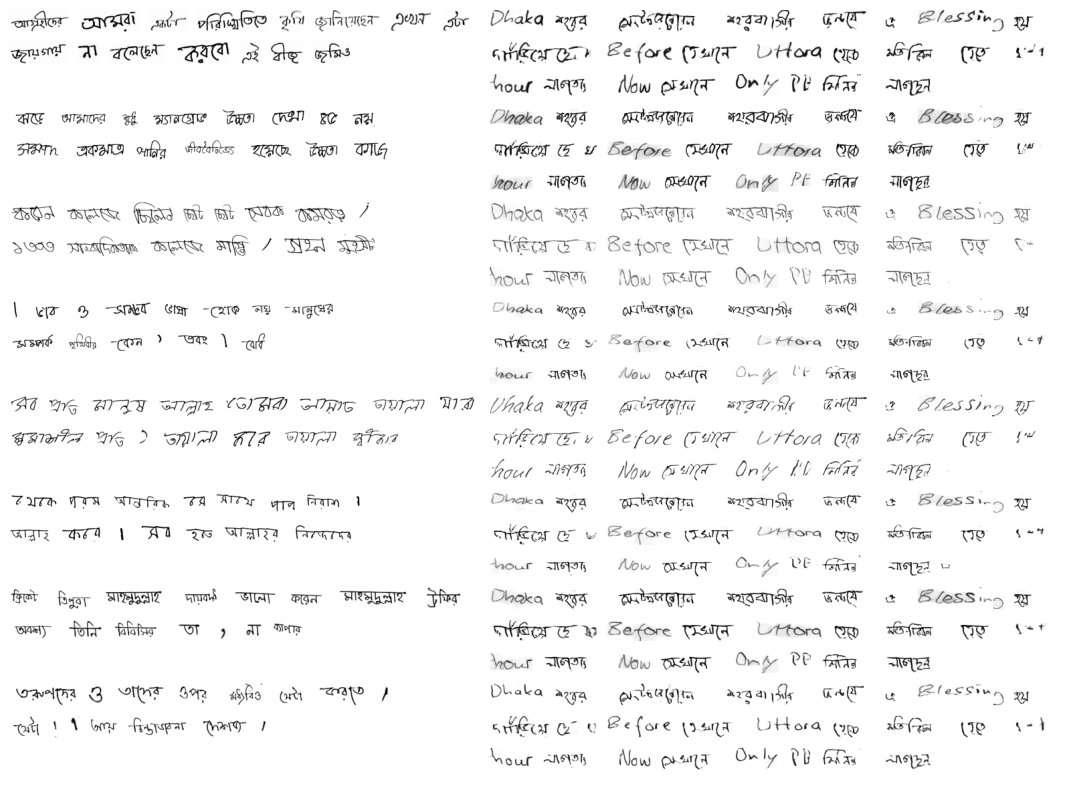

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.imshow(page_val, cmap='gray')
plt.axis('off')


In [16]:
import numpy as np
from PIL import Image

# Create a sample NumPy array (for example, a random grayscale image)
array = (page_val * 255).astype(np.uint8)  # Convert to unsigned 8-bit integer type

# Convert NumPy array to image
img = Image.fromarray(array)

# Save the image
img.save('output_image.png')  # Save as PNG, you can change the extension to other formats like '.jpg', '.bmp'


In [ ]:
!rm -r files

In [ ]:
import pytorch_fid

# Define paths to the real and generated image folders in Kaggle's input directory
DATASET_PATH = '/kaggle/working/Handwriting-Transformers/saved_images/BN-UNIFIED-1-339-15-E3D3-LR0.00005-bs8'  # Replace with your dataset name
real_images_path = os.path.join(DATASET_PATH, 'Real')  # Path to real images folder
generated_images_path = os.path.join(DATASET_PATH, 'Fake')  # Path to generated images folder

# fid = pytorch_fid.FID(real_images_path, generated_images_path)

!python3 -m pytorch_fid {real_images_path} {generated_images_path}